# **TEAM 22 : Similar Places Recommendation System for Sustainable Tourism**

 **Hari Chandan Gooda UBIT : 50614165**

 **Pramila Yadav UBIT : 50613803**
 
 **Tharunnesh Ramamoorthy UBIT : 50611344**
 
 **Keshav Narayan Srinivasan UBIT : 50610509**

# **TASK 1: PROBLEM STATEMENT**

Tourism has grown tremendously over the past two decades, majorly because of affordable transport fares and rise in middle class population. But being mostly aware of popular places, a large proportion of tourists choose to visit those places, causing overcrowding. As a result, we see reports of huge demand over resources and a surge in pollution in such places. By studying the data, we aim to understand the patterns in tourism and suggest similar yet less popular places that will promote sustainable tourism. In other words, we want to reduce the repercussions caused by overcrowding in certain places and also, let people know about new and exciting places.

# **TASK 3: DATA RETRIEVAL**

We have planned to use the dataset from Google maps, hence we have used few scraping techniques such as seleniuma nd scrapy with the help of certain scraping guides to create our dataset for 4000 tourism places in the United States of America. The dataset contains data pertaining to popularity controls, Working hours and location that can give us some meaningful data that we can work with. It is completely unstructured and we have to clean it accordingly to get the data and modeling we want to do in the future for this project.

**Loading our Scraped Dataset which needs to be cleaned** 

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "Data.csv"
df = pd.read_csv(file_path)

**DATA CLEANING**
1) Handling missing values in important columns 

In [3]:
df_cleaned = df.dropna(subset=['latitude', 'popular_times', 'longitude', 'rating'])

2) Converting Cities and States to a unified format

In [4]:

df_cleaned['city'] = df_cleaned['city'].str.lower()
df_cleaned['us_state'] = df_cleaned['us_state'].str.lower()
df_cleaned['city'] = df_cleaned['city'].str.capitalize()
df_cleaned['us_state'] = df_cleaned['us_state'].str.capitalize()

3) Normalizing the working hours for time consistent format

In [5]:
df_cleaned['working_hours'] = df_cleaned['working_hours'].astype(str)
df_cleaned['working_hours'] = df_cleaned['working_hours'].apply(lambda x: re.sub(r'[a-zA-Z\s]+', '', x))
df_cleaned['working_hours'] = df_cleaned['working_hours'].fillna('Unknown')

def get_weekday_hours(working_hours):
    try:
        parts = working_hours.split(':')
        weekday_parts = parts[:5]
        weekday_hours = sum(1 for part in weekday_parts if part.strip())
        return weekday_hours
    except Exception as e:
        return 0 

def get_weekend_hours(working_hours):
    try:
        parts = working_hours.split(':')
        weekend_parts = parts[5:7]
        weekend_hours = sum(1 for part in weekend_parts if part.strip())
        return weekend_hours
    except Exception as e:
        return 0  
    
df_cleaned['weekday_hours'] = df_cleaned['working_hours'].apply(get_weekday_hours)
df_cleaned['weekend_hours'] = df_cleaned['working_hours'].apply(get_weekend_hours)


4) Making the names uniform by applying title case

In [6]:
df_cleaned['name'] = df_cleaned['name'].str.title()

5) Removing invalid latitude and longitude range and bringing precision to them

In [7]:
df_cleaned = df_cleaned[(df_cleaned['latitude'].between(-90, 90)) & (df_cleaned['longitude'].between(-180, 180))]
df_cleaned['latitude'] = df_cleaned['latitude'].round(6)
df_cleaned['longitude'] = df_cleaned['longitude'].round(6)

6) Creating a new column 'rating_category' based on 'rating' (with tiers as low, medium, high)

In [8]:
df_cleaned['rating_category'] = pd.cut(df_cleaned['rating'], bins=[0, 3, 4.5, 5], labels=['Low', 'Medium', 'High'])

7) Removing the whitespace from following columns

In [9]:
df_cleaned['name'] = df_cleaned['name'].str.strip()
df_cleaned['city'] = df_cleaned['city'].str.strip()

8) Introducing a new column 'is_weekend_open' based on 'working_hours' to check if locations are open on weekends

In [10]:
def has_values_after_colon(working_hours):
    try:
        parts = working_hours.split(':')
        if len(parts) > 6 and parts[6].strip(): 
            return True
        if len(parts) > 7 and parts[7].strip():
            return True
        return False
    except Exception as e:
        return False

df_cleaned['is_weekend_open'] = df_cleaned['working_hours'].apply(has_values_after_colon)

9) Convertings 'rating' column to numeric data if any inconsitency

In [11]:
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['rating'])


10) Creating columns 'weekday_hours'and 'weekend_hours'

In [12]:
df_cleaned['working_hours'] = df_cleaned['working_hours'].apply(lambda x: re.sub(r'[^\d:-]', '', x))
df_cleaned['weekday_hours'] = df_cleaned['working_hours'].apply(get_weekday_hours)
df_cleaned['weekend_hours'] = df_cleaned['working_hours'].apply(get_weekend_hours)

11) Standardize the 'rating' column by scaling it to a range of 0 to 5

In [13]:
df_cleaned['rating_scaled'] = (df_cleaned['rating'] / df_cleaned['rating'].max()) * 5
df_cleaned.to_csv("C:\\Users\\kesha\\OneDrive\\UB\\Fall 2024\\Data Intensive Computing\\Project\\Data_3.csv")

# **TASK 2**
Name: Keshav Narayan Srinivasan UBIT: 50610509 

Question 1: Do states with higher average ratings offer a better overall tourism experience?

How it is significant: As we Analyze the average ratings by state, we can be able to provide valuable insights into the overall tourism quality that is being in different regions especially in States this case which has consistently high ratings might offer better services and tourism attractions, while those with lower ratings may have issues that need to be addressed. 

How it leads to objective: We can do this by identifying high-potential states and understanding what makes them successful in terms of the tourist’s satisfaction

Question 2: How does the variance between weekend working hours impact customer ratings?

How it is significant:  Large amount of variance in working hours might affect customer’s enjoyment and their satisfaction. Their comfortableness will be ruined with lower ratings. For example, if a location offers less hours on the weekend, it may lead to customer dissatisfaction, especially for office goers who are only free in weekend.

How it leads to objective: By understanding this relationship, Tourism companies and places can change and optimize their hours, leading to higher satisfaction by balancing the demand to adjust both the weekend and weekday population.


# **TASK 5: EDA for the Questions**

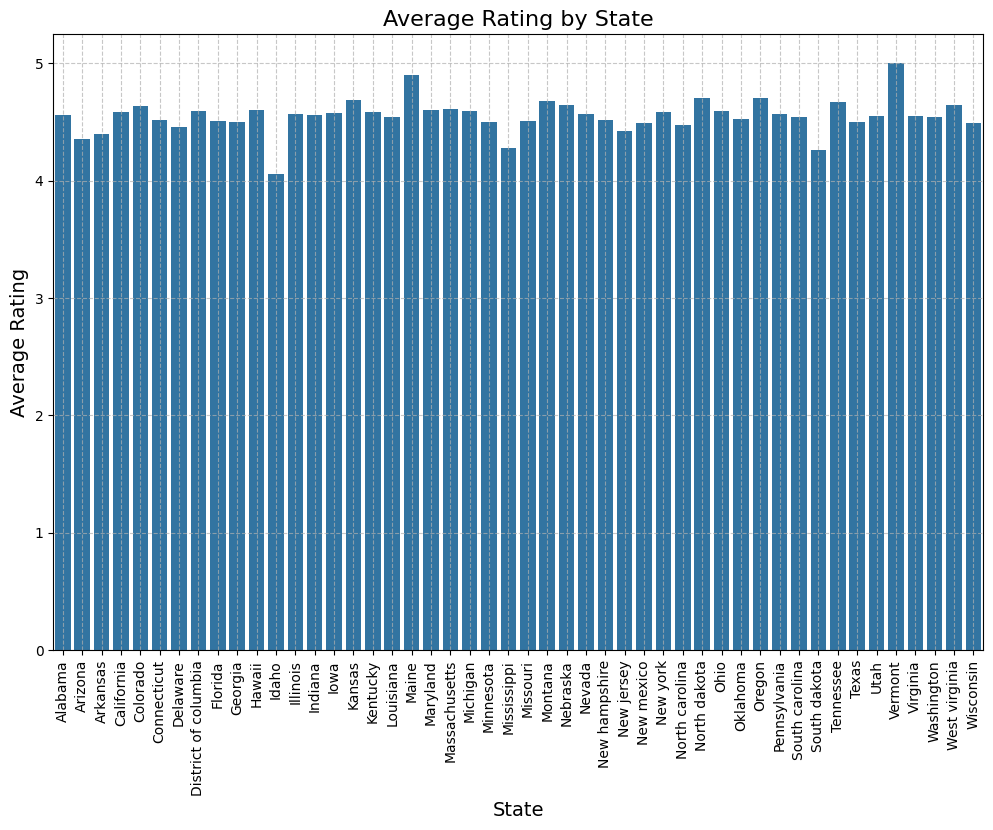

In [18]:
# Hypothesis 1: Average rating by state
state_avg_rating = df_cleaned.groupby('us_state')['rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='us_state', y='rating', data=state_avg_rating)
plt.title('Average Rating by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


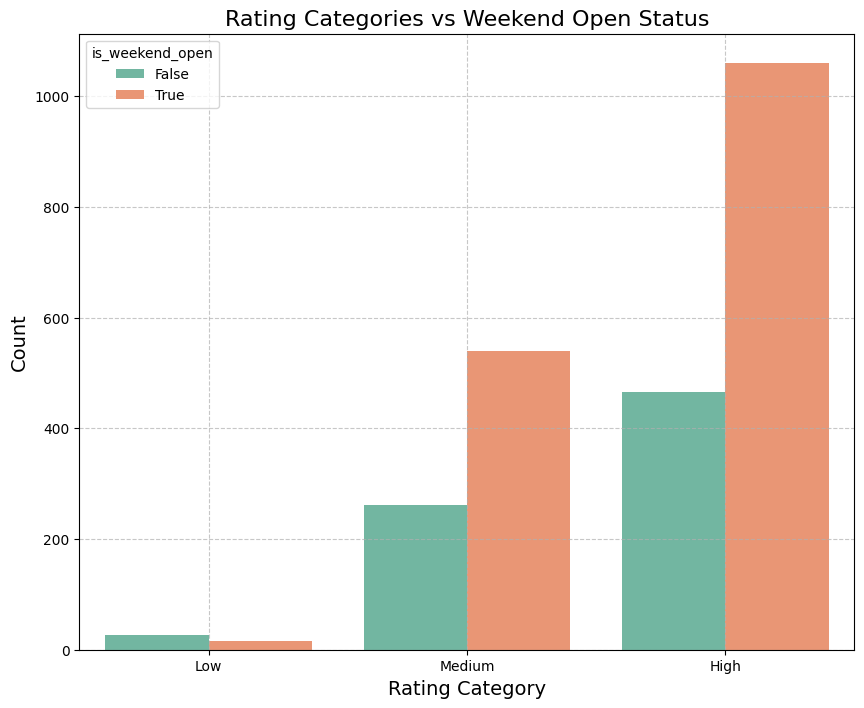

In [19]:
# Hypothesis 2: Rating categories and weekend open status
plt.figure(figsize=(10, 8))
sns.countplot(x='rating_category', hue='is_weekend_open', data=df_cleaned, palette='Set2')
plt.title('Rating Categories vs Weekend Open Status', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
